In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
print(df.shape)

(8807, 12)


In [6]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [8]:
print(df.describe(include='all'))

       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough 

In [9]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#What type of content dominates Netflix?

In [10]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


<Axes: title={'center': 'Movies vs TV Shows'}, xlabel='type'>

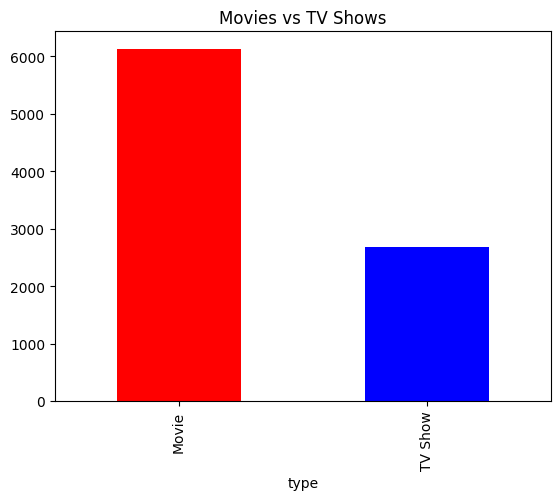

In [13]:
df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows', color=['red', 'blue'])

In [ ]:
# Question 2: When were most titles added to Netflix?

In [6]:
# Convert 'date_added' to datetime format
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year from date
df['year_added'] = df['date_added'].dt.year

# Count titles by year
yearly_data = df['year_added'].value_counts().sort_index()
print(yearly_data)

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


<Axes: title={'center': 'Content Added to Netflix Over Years'}, xlabel='year_added'>

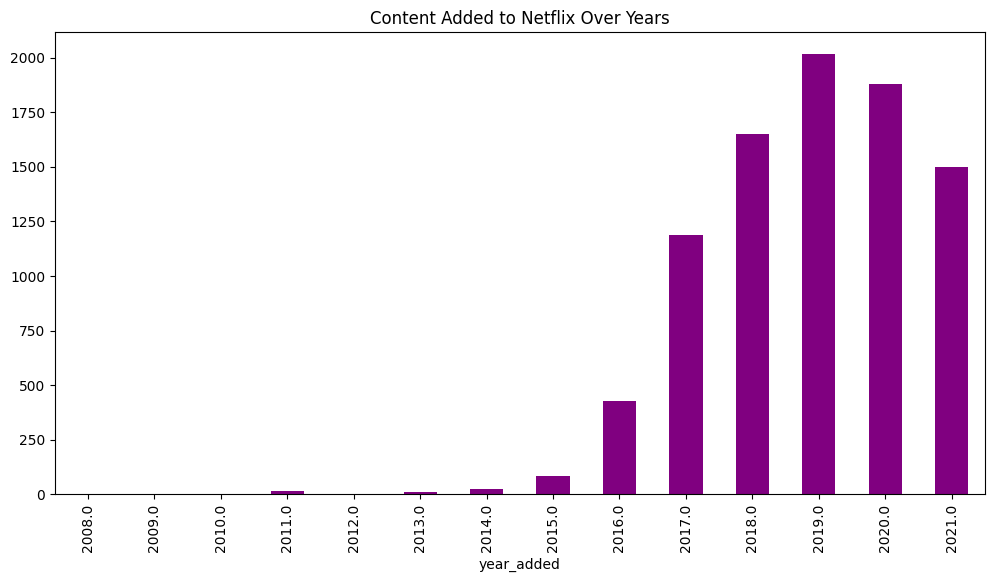

In [7]:
yearly_data.plot(kind='bar', figsize=(12,6), title='Content Added to Netflix Over Years', color='purple')

In [1]:
#Question 3: Which countries have the most Netflix content?

In [4]:
country_counts = df['country'].value_counts().head(10)
print(country_counts)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Countries by Netflix Content'}, ylabel='country'>

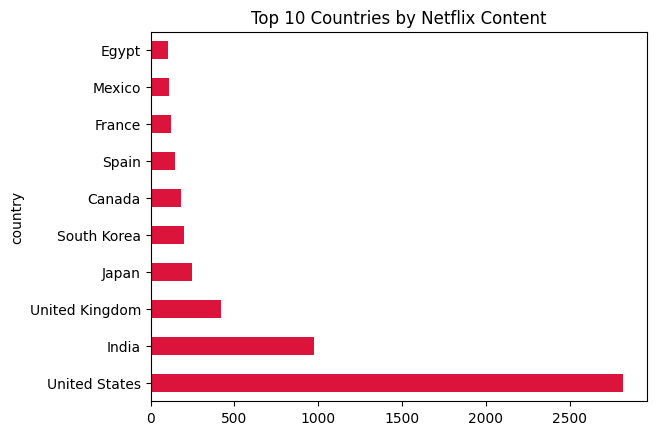

In [5]:
country_counts.plot(kind='barh', title='Top 10 Countries by Netflix Content', color='crimson')

In [6]:
#Question 4: What are the most common genres on Netflix?

In [4]:
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = sum(genre_series, []) 
genre_counts = Counter(all_genres)

print(genre_counts.most_common(10))

[('International Movies', 2752), ('Dramas', 2427), ('Comedies', 1674), ('International TV Shows', 1351), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 763), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


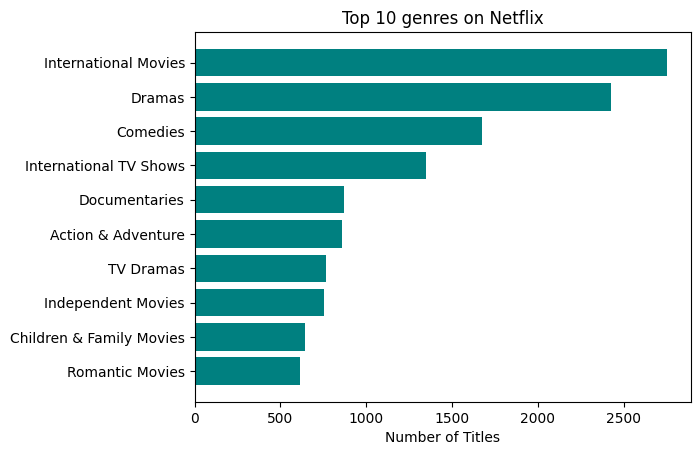

In [5]:
import matplotlib.pyplot as plt

top_genres = dict(genre_counts.most_common(10))
plt.barh(list(top_genres.keys()), list(top_genres.values()), color='teal')
plt.title('Top 10 genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

In [6]:
#Question 5: Who are the most featured directors and actors on Netflix?

In [7]:
#Remove NaNs and split comma-seperated names
directors = df['director'].dropna().apply(lambda x: x.split(', '))
from collections import Counter
top_directors = Counter(sum(directors, [])).most_common(10)

print("Top 10 Directors:")
for d in top_directors:
    print(f"{d[0]} - {d[1]} titles")

Top 10 Directors:
Rajiv Chilaka - 22 titles
Jan Suter - 21 titles
Raúl Campos - 19 titles
Suhas Kadav - 16 titles
Marcus Raboy - 16 titles
Jay Karas - 15 titles
Cathy Garcia-Molina - 13 titles
Youssef Chahine - 12 titles
Martin Scorsese - 12 titles
Jay Chapman - 12 titles


In [8]:
#'cast column contains actors
actors = df['cast'].dropna().apply(lambda x: x.split(', '))
top_actors = Counter(sum(actors, [])).most_common(10)

print("\nTop 10 Actors:")
for a in top_actors:
    print(f"{a[0]} - {a[1]} titles")


Top 10 Actors:
Anupam Kher - 43 titles
Shah Rukh Khan - 35 titles
Julie Tejwani - 33 titles
Naseeruddin Shah - 32 titles
Takahiro Sakurai - 32 titles
Rupa Bhimani - 31 titles
Akshay Kumar - 30 titles
Om Puri - 30 titles
Yuki Kaji - 29 titles
Amitabh Bachchan - 28 titles


In [9]:
#Question 6: What's the average duration of Movies vs TV Shows on Netflix?

In [12]:
movies_df = df[df['type'] == 'Movies']

movies_df = movies_df[movies_df['duration'].notna()]
movies_df['duration_int'] = movies_df['duration'].str.replace(' min', '').astype(int)
print("Average Movie Duration:", movies_df['duration_int'].mean())

Average Movie Duration: nan


In [15]:
shows_df = df[df['type'] == 'TV Show'].copy()
shows_df = shows_df[shows_df['duration'].notna()]  # drop NaNs

# Normalize everything: strip spaces, lowercase, remove 'season(s)' using regex
shows_df['duration_clean'] = shows_df['duration'].str.strip().str.lower().str.extract('(\d+)')

# Drop any rows where extraction failed
shows_df = shows_df[shows_df['duration_clean'].notna()]

# Now convert to int safely
shows_df['duration_int'] = shows_df['duration_clean'].astype(int)

print("Average TV Show Duration (in seasons):", shows_df['duration_int'].mean())


Average TV Show Duration (in seasons): 1.764947683109118


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/g9/f0h_fpvn0x9gjfm1wcq6j3yh0000gn/T/ipykernel_16288/1715310686.py:5: SyntaxWarning: invalid escape sequence '\d'
  shows_df['duration_clean'] = shows_df['duration'].str.strip().str.lower().str.extract('(\d+)')


In [16]:
#Final Question: How many Movies vs TV Shows were added each year?

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


In [18]:
content_trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
print(content_trend.tail())

type         Movie  TV Show
year_added                 
2017.0       839.0    325.0
2018.0      1237.0    388.0
2019.0      1424.0    575.0
2020.0      1284.0    594.0
2021.0       993.0    505.0


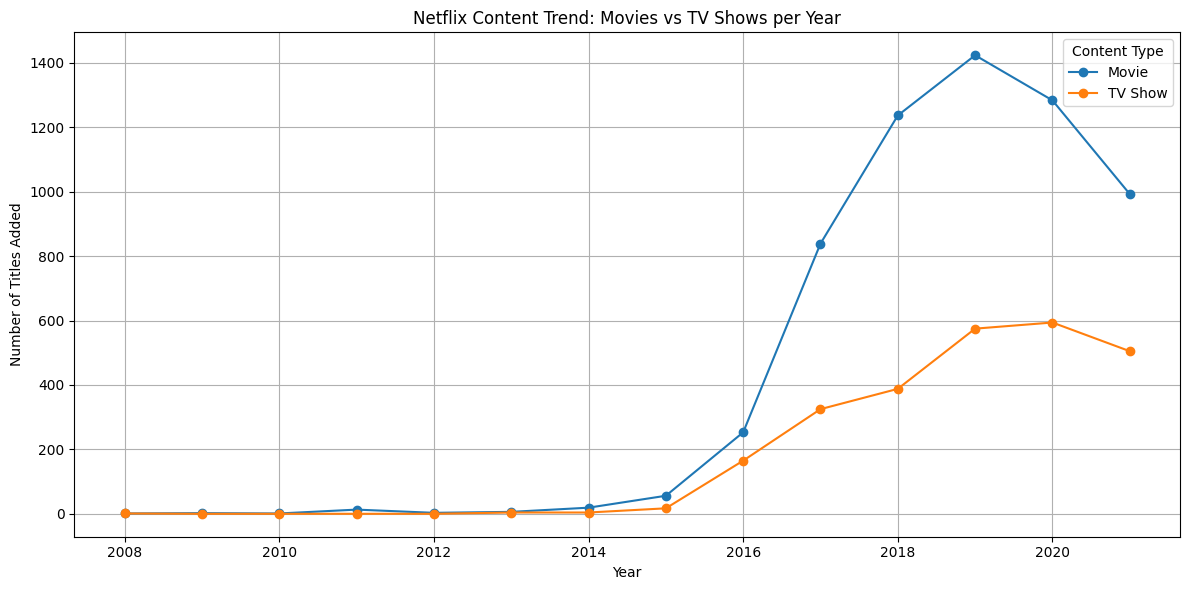

In [19]:
import matplotlib.pyplot as plt

content_trend.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Netflix Content Trend: Movies vs TV Shows per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()